In [46]:
import numpy as np
import yfinance as yf 
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [47]:
end = dt.datetime.now()
start = dt.datetime(end.year - 1,end.month,end.day)

df = yf.download('ITMG.JK', 
                       start, 
                       end,
                       progress=False,
                       auto_adjust=True)

In [48]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2020-10-21,8450.0,8450.0,8225.0,8225.0,1526400
2020-10-22,8250.0,8275.0,8050.0,8050.0,7631900
2020-10-23,8100.0,8150.0,8075.0,8075.0,944900
2020-10-26,8050.0,8200.0,8050.0,8125.0,2706700
2020-10-27,8125.0,8200.0,8050.0,8125.0,1842100


In [49]:
rsi_period= 14
change = df['Close'].diff()
gain = change.mask(change < 0, 0)
loss = change.mask(change > 0, 0)

In [50]:
average_gain = gain.ewm(com= rsi_period-1, min_periods=rsi_period).mean()
average_loss = loss.ewm(com= rsi_period-1, min_periods=rsi_period).mean()
rs = abs(average_gain/average_loss)
rsi = 100 - (100/(1+rs))

In [51]:
df['rsi'] = rsi
print(df)

                    Open          High           Low         Close   Volume  \
Date                                                                          
2019-11-01  11842.100586  12005.924112  11537.856895  11842.100586  1479400   
2019-11-04  11888.907555  11935.714277  11701.680664  11701.680664   993500   
2019-11-05  11701.680262  12169.747472  11678.276901  11935.713867  2010300   
2019-11-06  12169.747555  12310.167719  11865.503866  11888.907227  1423700   
2019-11-07  11888.907723  12052.731254  11514.453936  11608.067383  1694000   
...                  ...           ...           ...           ...      ...   
2020-10-21   8450.000000   8450.000000   8225.000000   8225.000000  1526400   
2020-10-22   8250.000000   8275.000000   8050.000000   8050.000000  7631900   
2020-10-23   8100.000000   8150.000000   8075.000000   8075.000000   944900   
2020-10-26   8050.000000   8200.000000   8050.000000   8125.000000  2706700   
2020-10-27   8125.000000   8200.000000   8050.000000

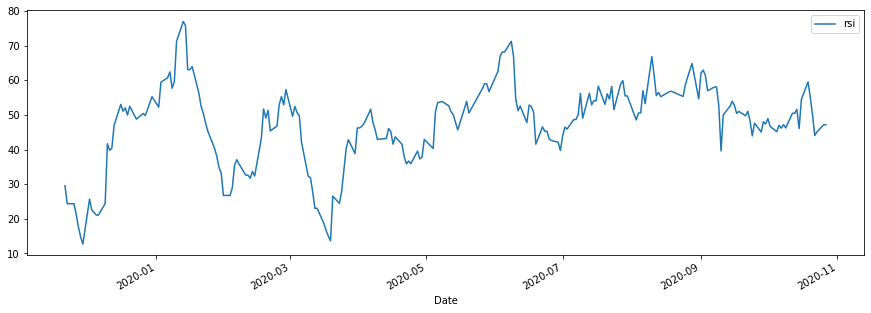

In [52]:
df[['rsi']].plot(figsize=(15,5))

In [53]:
def buy_Sell(signal) :
    Buy = []
    Sell = []
    flag = -1

    
    for i in range(0, len(signal)):
        if signal['rsi'][i] < 20:
            Sell.append(np.nan)
            if flag != 1:
                Buy.append(signal['Close'][i])
                flag = 1
            else:
                Buy.append(np.nan)          
        elif signal['rsi'][i] > 70:
            Buy.append(np.nan)
            if flag != 0:
                Sell.append(signal['Close'][i])
                flag = 0
            else:
                Sell.append(np.nan)       
        else:
                Buy.append(np.nan)
                Sell.append(np.nan)  
                
                    
    return (Buy, Sell)

In [54]:
a=buy_Sell(df)
df['Buy_Signal_Price'] =a[0]
df['Sell_Signal_Price'] =a[1]

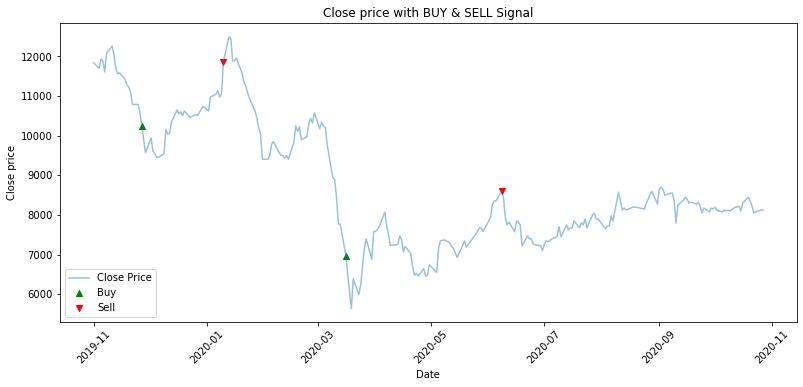

In [55]:
plt.figure(figsize=(13.2, 5.5))
plt.scatter(df.index, df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha =1)
plt.scatter(df.index, df['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha =1)
plt.plot(df['Close'], label='Close Price', alpha =0.45)
plt.title('Close price with BUY & SELL Signal')
plt.xticks(rotation =45)         
plt.xlabel('Date')
plt.ylabel('Close price')
plt.legend(loc = 'lower left') 
plt.show()